In [88]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [90]:
titanic_data = pd.read_csv('titanic.csv')

In [91]:
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,False,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,False,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,False,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,False,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [92]:
titanic_data.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [93]:
titanic_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


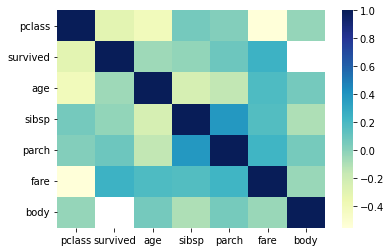

In [94]:
sns.heatmap(titanic_data.corr(), cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='survived', ylabel='count'>

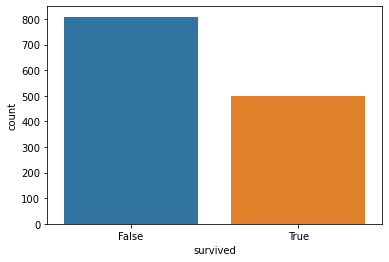

In [96]:
sns.countplot(x= 'survived', data = titanic_data )

In [97]:
titanic_data['survived'].value_counts()

False    809
True     500
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

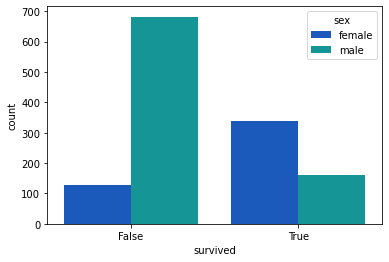

In [99]:
sns.countplot(x='survived', hue = 'sex', data = titanic_data, palette= 'winter')

In [100]:
titanic_data.groupby(['sex']) ['survived'].value_counts()

sex     survived
female  True        339
        False       127
male    False       682
        True        161
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

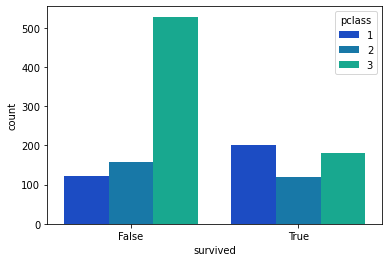

In [102]:
sns.countplot(x='survived', hue = 'pclass', data = titanic_data, palette= 'winter')

In [103]:
titanic_data.groupby(['pclass']) ['survived'].value_counts()

pclass  survived
1       True        200
        False       123
2       False       158
        True        119
3       False       528
        True        181
Name: survived, dtype: int64

In [104]:
titanic = titanic_data[(titanic_data['sibsp'] ==0) & (titanic_data['parch']==0)]
display(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
5,1,True,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,False,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,False,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
12,1,True,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,False,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,False,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,False,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,False,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


check if the ticket fare for different class

In [106]:
#titanic= titanic_data[(titanic_data['sibsp'] ==0) & (titanic_data['parch']==0)]
titanic.groupby(['pclass'])['fare'].mean()   #class1 had higher fare

pclass
1    65.470155
2    15.246887
3     9.096707
Name: fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

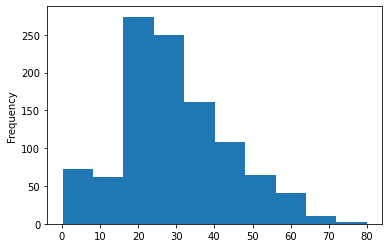

In [107]:
titanic_data['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

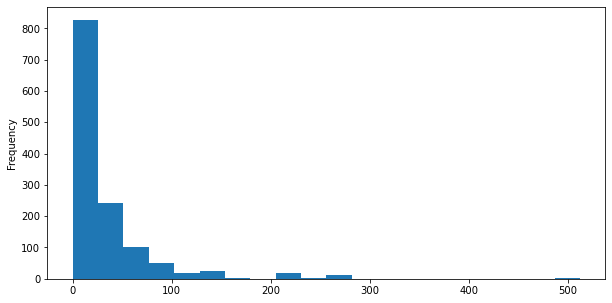

In [108]:
titanic_data['fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='sibsp', ylabel='count'>

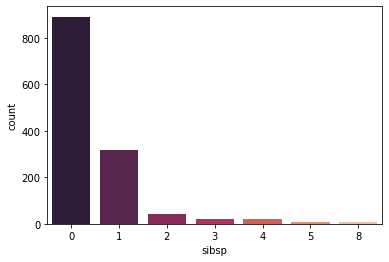

In [109]:
sns.countplot(x='sibsp', data = titanic_data, palette= 'rocket')

In [110]:
titanic_data['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [111]:
titanic_data['parch'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

<AxesSubplot:xlabel='parch', ylabel='count'>

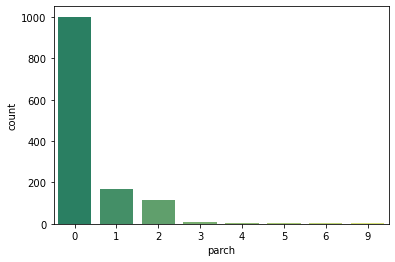

In [112]:
sns.countplot(x='parch', data = titanic_data, palette= 'summer')

# Data Wrangling

In [113]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='age'>

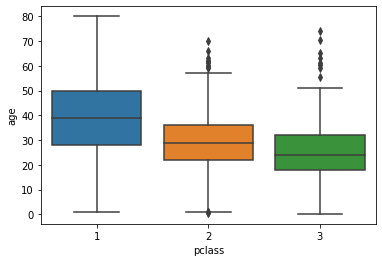

In [114]:
sns.boxplot(x='pclass', y='age', data= titanic_data)  #passenger travelling in class-1 and 2 are older than class-3 passengr

In [116]:
titanic_data.drop(columns={'cabin', 'boat', 'body', 'home_dest'}, axis=1, inplace=True)


In [117]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [119]:
titanic_data.dropna(inplace=True)

In [120]:
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

# One hot encoding

In [121]:
pd.get_dummies(titanic_data['sex'])  #get dummies function is used to convert categorical vaiables to indicator vaiables

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1301,0,1
1304,1,0
1306,0,1
1307,0,1


In [122]:
sex=pd.get_dummies(titanic_data['sex'], drop_first= True)  #drop female column. only male column is suffient. male=1, female=0
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [123]:
embark=pd.get_dummies(titanic_data['embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [124]:
embark=pd.get_dummies(titanic_data['embarked'], drop_first= True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [125]:
Pcl = pd.get_dummies(titanic_data['pclass'])
Pcl.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [126]:
Pcl = pd.get_dummies(titanic_data['pclass'], drop_first= True)
Pcl.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [127]:
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis=1)
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2,3
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,1,0,0
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,1,0,0
2,1,False,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,1,0,0
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,1,0,0
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,1,0,0


In [128]:
titanic_data.drop(['name', 'pclass', 'ticket', 'sex', 'embarked'], axis =1, inplace= True)
titanic_data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,True,29.0000,0,0,211.3375,0,0,1,0,0
1,True,0.9167,1,2,151.5500,1,0,1,0,0
2,False,2.0000,1,2,151.5500,0,0,1,0,0
3,False,30.0000,1,2,151.5500,1,0,1,0,0
4,False,25.0000,1,2,151.5500,0,0,1,0,0


# Train and Test the  model

In [129]:
X= titanic_data.drop('survived', axis=1)
Y= titanic_data['survived']

In [160]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42, shuffle=True)

In [161]:
LRM = LogisticRegression()

In [162]:
LRM.fit(X_train, Y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
predictions = LRM.predict(X_test)

In [164]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n       False       0.78      0.87      0.82       125\n        True       0.77      0.63      0.69        84\n\n    accuracy                           0.78       209\n   macro avg       0.77      0.75      0.76       209\nweighted avg       0.77      0.78      0.77       209\n'

In [165]:
confusion_matrix(Y_test, predictions)

array([[109,  16],
       [ 31,  53]], dtype=int64)

In [166]:
accuracy_score(Y_test, predictions)

0.7751196172248804